In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


raw = pd.read_csv("/Users/sadikerisen/Desktop/insurance.csv")
df = pd.DataFrame(raw)

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [184]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [185]:
smokers = list(filter(lambda x: x == True, df["smoker"] == "yes"))
nonsmokers = list(filter(lambda x: x == True, df["smoker"] == "no"))



print("Smokers:",len(smokers), "Non-smokers:",len(nonsmokers))




Smokers: 274 Non-smokers: 1064


Text(0, 0.5, 'Amount')

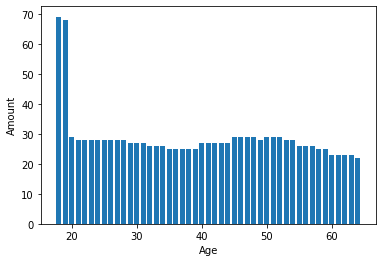

In [186]:
#Age Samples
age = dict(Counter(df["age"]))
keys = list(age.keys())
values = list(age.values())

plt.bar(keys, values)
plt.xlabel("Age")
plt.ylabel("Amount")

Text(0, 0.5, 'BMI')

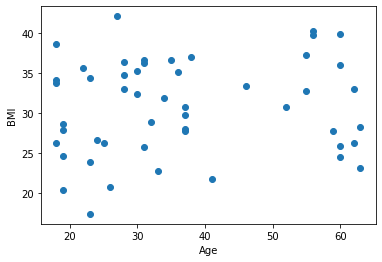

In [187]:
plt.scatter(df.age.head(50), df.bmi.round(4).head(50))
plt.xlabel("Age")
plt.ylabel("BMI")


Text(0, 0.5, 'Charges')

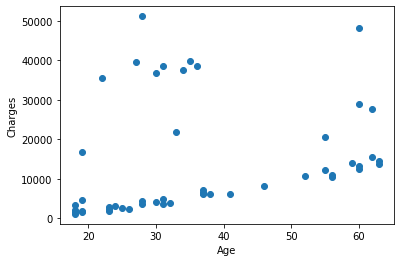

In [188]:
plt.scatter(df.age.head(50), df.charges.round(4).head(50))
plt.xlabel("Age")
plt.ylabel("Charges")


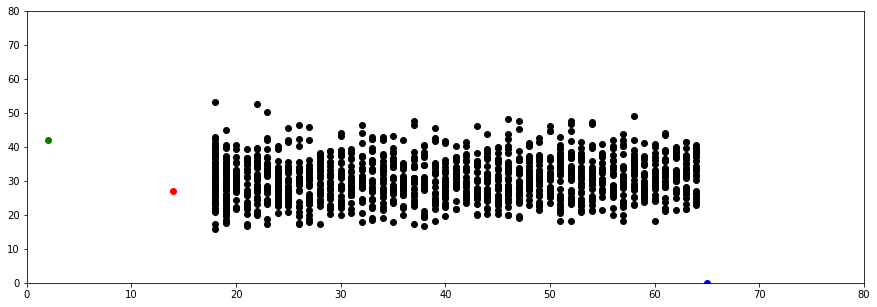

In [189]:
k = 3
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(15, 5))
plt.scatter(df['age'], df['bmi'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   distance_from_1  distance_from_2  distance_from_3  closest color  
0         5.080354        22.086421        53.799721        1     r  
1         7.863390        17.992579        57.874113        1     r  
2        15.231546        27.513633        49.578221        1     r  
3        19.479400        36.514340        39.236680        1     r  
4        18.097911        32.743463        43.852644        1     r  


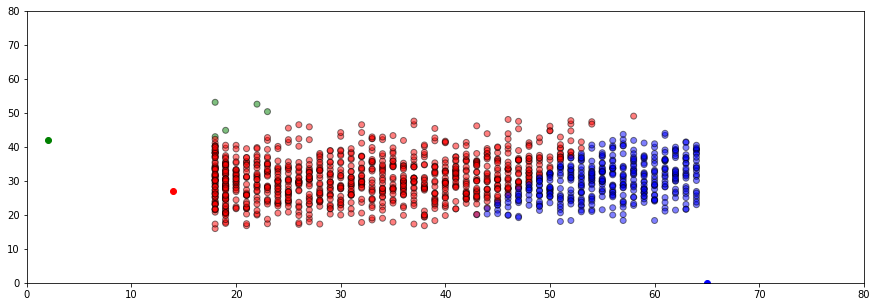

In [190]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['age'] - centroids[i][0]) ** 2
                + (df['bmi'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(15, 5))
plt.scatter(df['age'], df['bmi'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

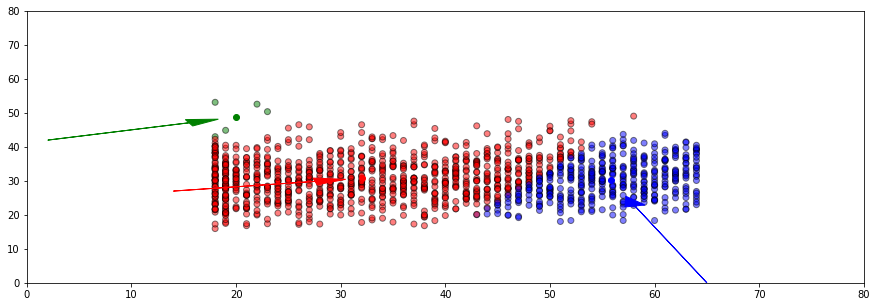

In [191]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['age'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['bmi'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(15, 5))
ax = plt.axes()
plt.scatter(df['age'], df['bmi'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)


for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()


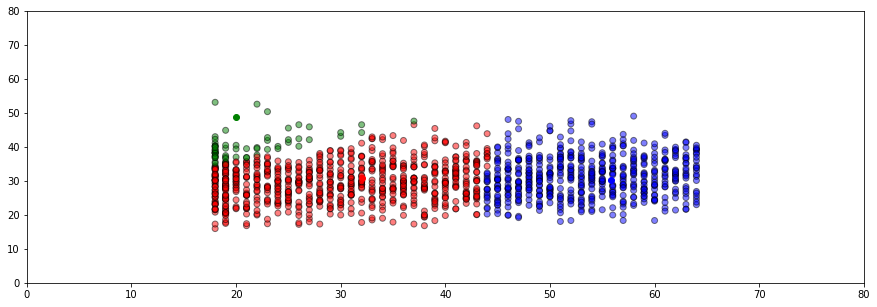

In [192]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(15, 5))
plt.scatter(df['age'], df['bmi'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

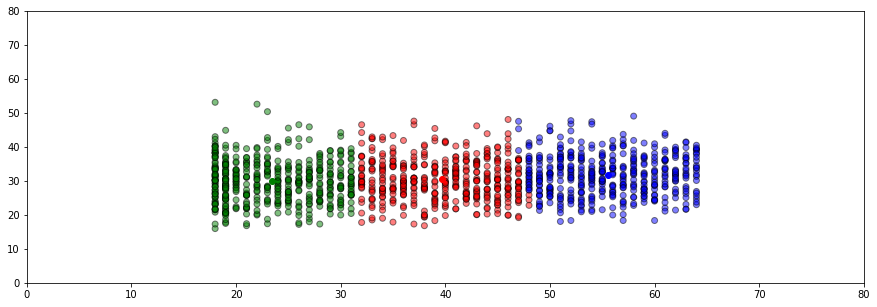

In [193]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(15, 5))
plt.scatter(df['age'], df['bmi'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [202]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["age", "bmi"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [203]:
labels = kmeans.predict(df[["age", "bmi"]])
centroids = kmeans.cluster_centers_

<Figure size 1080x360 with 0 Axes>

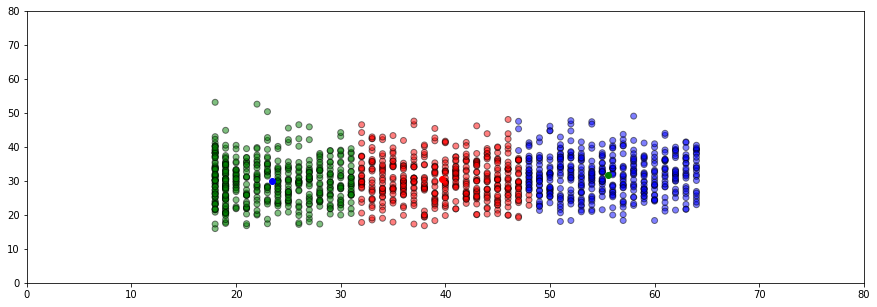

In [206]:
fig = plt.figure(figsize=(15, 5))

colors = map(lambda x: colmap[x+1], labels)

fig = plt.figure(figsize=(15, 5))
plt.scatter(df['age'], df['bmi'], color=df['color'], alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()